# For plotting of accuracy and loss for all validation files in a folder
Used for testing purposes

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as mt
import numpy as np

In [2]:
target_dir = "/home/vincent/Documenten/BachelorsProject/ft_mat/"

In [3]:
# Get the validation and testing data:
validation = dict()
test = dict()

for file in os.scandir(target_dir):
    if file.is_file() and "-validation.csv" in file.name:
        validation[file.name[:file.name.find("-validation.csv")]] = pd.read_csv(file.path)
    elif file.is_file() and "-test_predictions.csv" in file.name:
        test[file.name[:file.name.find("-test_predictions.csv")]] = file.path

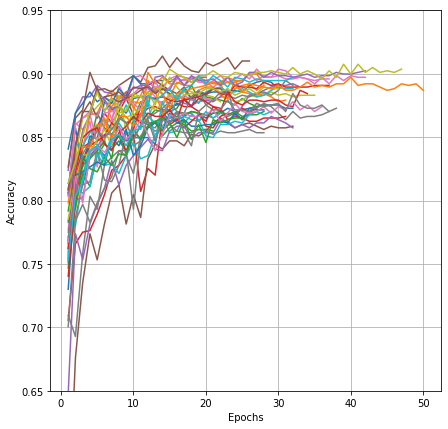

In [8]:
# Plotting accuracy:
for model in validation:
    df = validation[model]
    x = [idx + 1 for idx in range(len(df))]
    y = df["accuracy"].to_list()
    plt.plot(x, y, label=model)

# plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(top=.95, bottom=.65)

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

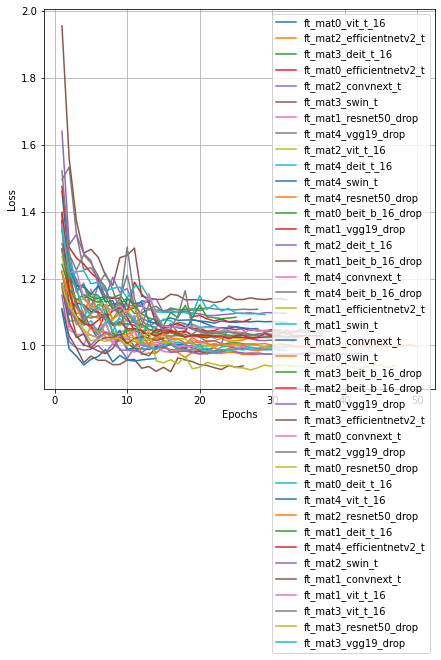

In [5]:
# Plotting loss:
for model in validation:
    df = validation[model]
    x = [idx + 1 for idx in range(len(df))]
    y = df["mean_loss"].to_list()
    plt.plot(x, y, label=model)

plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

In [6]:
def getArrays(csv_predictions: str, csv_confusion: str):
    """Returns numpy arrays we can work with using scikit-learn"""
    df_pred = pd.read_csv(csv_predictions)
    df_conf = pd.read_csv(csv_confusion)

    true_y = df_pred["actual_idx"].to_numpy()
    pred_y = df_pred[df_conf.columns[1:]].to_numpy()

    # Rows gives actual, columns prediction
    conf = df_conf[df_conf.columns[1:]].to_numpy().T

    return true_y, pred_y, conf

In [7]:
for model in test:
    pred: str = test[model]
    conf: str = pred.replace("predictions.csv", "confusion.csv")
    if not os.path.exists(conf):
        continue # we need both, else we just skip it

    true_y, pred_y, _ = getArrays(pred, conf)
    pred_y_max = np.argmax(pred_y, axis=1)

    print("-" * 3 + model + "-" * 30)
    print(f"  Accuracy:          {mt.accuracy_score(true_y, pred_y_max)}")
    print(f"  Balanced Accuracy: {mt.balanced_accuracy_score(true_y, pred_y_max)}") 
    print(f"  Top 3 Accuracy:    {mt.top_k_accuracy_score(true_y, pred_y, k=3)}")
    print(f"  Top 5 Accuracy:    {mt.top_k_accuracy_score(true_y, pred_y, k=5)}")
    print("")

---ft_mat1_vit_t_16------------------------------
  Accuracy:          0.8856416772554002
  Balanced Accuracy: 0.7397843782750902
  Top 3 Accuracy:    0.9567979669631512
  Top 5 Accuracy:    0.9682337992376112

---ft_mat3_deit_t_16------------------------------
  Accuracy:          0.8640406607369758
  Balanced Accuracy: 0.7348272363458122
  Top 3 Accuracy:    0.9479034307496823
  Top 5 Accuracy:    0.9567979669631512

---ft_mat0_convnext_t------------------------------
  Accuracy:          0.8754764930114358
  Balanced Accuracy: 0.769750985283493
  Top 3 Accuracy:    0.9567979669631512
  Top 5 Accuracy:    0.974587039390089

---ft_mat4_convnext_t------------------------------
  Accuracy:          0.8907242693773825
  Balanced Accuracy: 0.7664473827399524
  Top 3 Accuracy:    0.9695044472681067
  Top 5 Accuracy:    0.9822109275730623

---ft_mat4_swin_t------------------------------
  Accuracy:          0.8919949174078781
  Balanced Accuracy: 0.7893798792653282
  Top 3 Accuracy:    0.96